# Курсовой проект.
# Вариант 12. Индекс удовлетворенности сотрудников.
# Выполнил студент гр. бПО-191 Никулин В.С.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Employee Satisfaction Index.csv')
data.head(10)

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
5,5,PUR7265,40,Purchasing,Suburb,UG,Referral,3,3,0,7,1,42419,1
6,6,PUR1466,26,Purchasing,Suburb,UG,Referral,5,5,0,2,0,86750,0
7,7,TECH5426,25,Technology,City,UG,Recruitment Agency,1,1,0,4,0,24076,0
8,8,HR6578,35,HR,City,PG,Referral,3,4,0,0,0,42419,1
9,9,TECH9322,45,Technology,City,PG,Referral,3,3,0,9,0,42419,0


## Описание датасета:
### Колонки:
1. Порядковый номер записи

2. emp_id -> Уникальный идентификатор сотрудника
3. age -> Возраст сотрудника
4. Dept -> Отдел, где работает
5. location -> Местоположение сотрудника
6. education -> Уровень образования
7. recruitment_type -> Тип занятости
8. job_level -> Уровень занимаемой должности (1 - наименьшее; 5 - наивысшее)
9. rating -> Рейтинг сотрдуника за прошлый год работы (1 - наименьшее; 5 - наивысшее)
10. onsite -> Трудовая занятость в пределах места проживания? (0 - Нет; 1 - Да)
11. awards -> Количество наград 
12. certifications -> Работник аттестован? (0 - Нет; 1 - Да)
13. salary -> Размер чистой зарплаты
14. satisfied -> Работник доволен своей работой? (0 - Нет; 1 - Да)

# Задание 1. Визуальный анализ данных.

## Matplotlib 
### 1. Stackplot

In [4]:
# Зависимость размера зарплаты сотрудников в зависимости от их возраста

salary = data[(data['salary'] != None)]['age'].value_counts()

salary_stack = np.array(salary.sort_index())
salary_array = np.array([salary.sort_index(), salary_stack])

print(salary_array)


[[12 19 19 19 18 15 11 17 13 10 17 14 20 12 16  9 22 16 19  9 16 18 16 17
  10 13 16 21 12 15 20 19]
 [12 19 19 19 18 15 11 17 13 10 17 14 20 12 16  9 22 16 19  9 16 18 16 17
  10 13 16 21 12 15 20 19]]


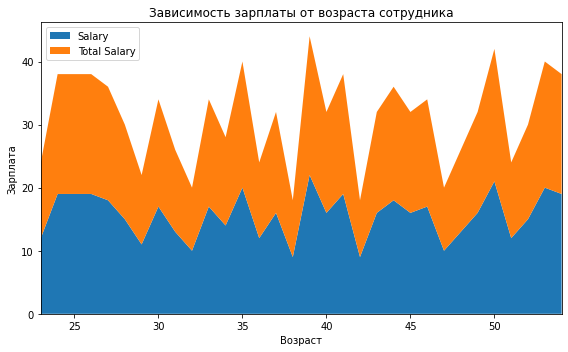

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.stackplot(salary.sort_index().index, salary_array, labels=['Salary', 'Total Salary'])

ax.set_title('Зависимость зарплаты от возраста сотрудника')

ax.legend(loc='upper left')

ax.set_ylabel('Зарплата')
ax.set_xlabel('Возраст')

ax.set_xlim(left = salary.index.min(), right = salary.index.max())

fig.tight_layout()

plt.show()

## Pandas
### 2. Pie

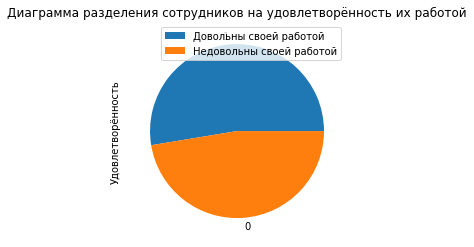

In [6]:
plt = data['satisfied'].value_counts().plot(kind='pie')

plt.set_title('Диаграмма разделения сотрудников на удовлетворённость их работой')
plt.set_ylabel('Удовлетворённость')

plt.legend(loc='upper right')
plt.legend(labels=['Довольны своей работой', 'Недовольны своей работой'])

### 3. Density

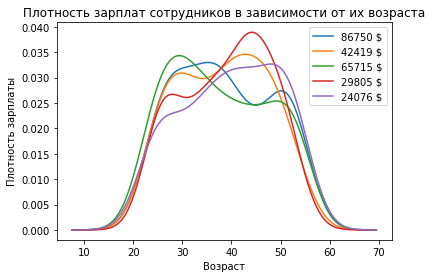

In [7]:
# plt = data.loc[data['salary'], 'age']

plt = data.loc[data['salary'] == 86750, 'age'].plot(kind='density')
plt = data.loc[data['salary'] == 42419, 'age'].plot(kind='density')
plt = data.loc[data['salary'] == 65715, 'age'].plot(kind='density')
plt = data.loc[data['salary'] == 29805, 'age'].plot(kind='density')
plt = data.loc[data['salary'] == 24076, 'age'].plot(kind='density')

# sns.kdeplot(data.loc[data['salary'] == 86750, "age"], shade=True, color="g", label="Cyl=4", alpha=.7)
# sns.kdeplot(data.loc[data['salary'] == 42419, "age"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
# sns.kdeplot(data.loc[data['salary'] == 65715, "age"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
# sns.kdeplot(data.loc[data['salary'] == 29805, "age"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# # Decoration
# plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
# plt.legend()
# plt.show()

# print(plt)

plt.set_title('Плотность зарплат сотрудников в зависимости от их возраста')
plt.set_ylabel('Плотность зарплаты')
plt.set_xlabel('Возраст')

plt.legend(['86750 $', '42419 $', '65715 $', '29805 $', '24076 $'])

### 4. Bar

Text(0.5, 0, 'Типы сотрудников')

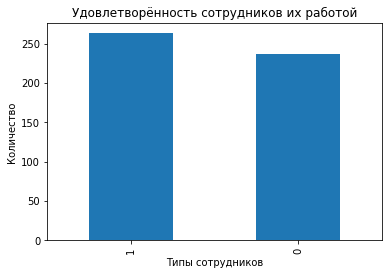

In [8]:
plt = data['satisfied'].value_counts().plot(kind='bar')

plt.set_title('Удовлетворённость сотрудников их работой')
plt.set_ylabel('Количество')
plt.set_xlabel('Типы сотрудников')


## Seaborn
### 5. Boxplot

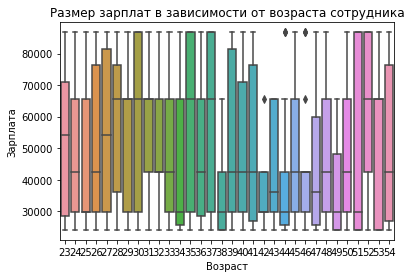

In [9]:
plt = sns.boxplot(x='age', y='salary', data=data)

plt.set_title("Размер зарплат в зависимости от возраста сотрудника")
plt.set_xlabel("Возраст")
plt.set_ylabel("Зарплата");

### 6. Countplot

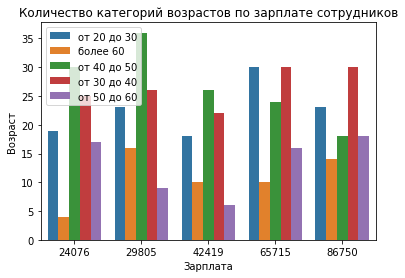

In [10]:
data['age_category'] = data['age'].apply(lambda age: 'меньше 20' if age < 20 else 'от 20 до 30' if age > 20 and age < 30 else 'от 30 до 40' if age > 30 and age < 40 else 'от 40 до 50' if age > 40 and age < 50 else 'от 50 до 60' if age > 50 and age < 60 else 'более 60')

plt = sns.countplot(x='salary', hue='age_category', data=data.loc[data['age']!=0,:])

plt.legend(loc='upper left')

plt.set_title("Количество категорий возрастов по зарплате сотрудников")
plt.set_xlabel("Зарплата")
plt.set_ylabel("Возраст");

### 7. Distplot

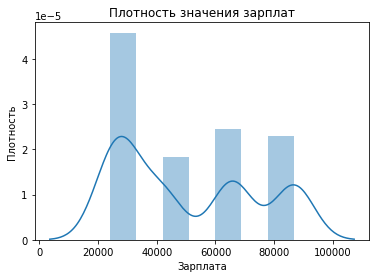

In [11]:
plt = sns.distplot(data.salary)

plt.set_title("Плотность значения зарплат")
plt.set_xlabel("Зарплата")
plt.set_ylabel("Плотность");

### 8. Pairplot

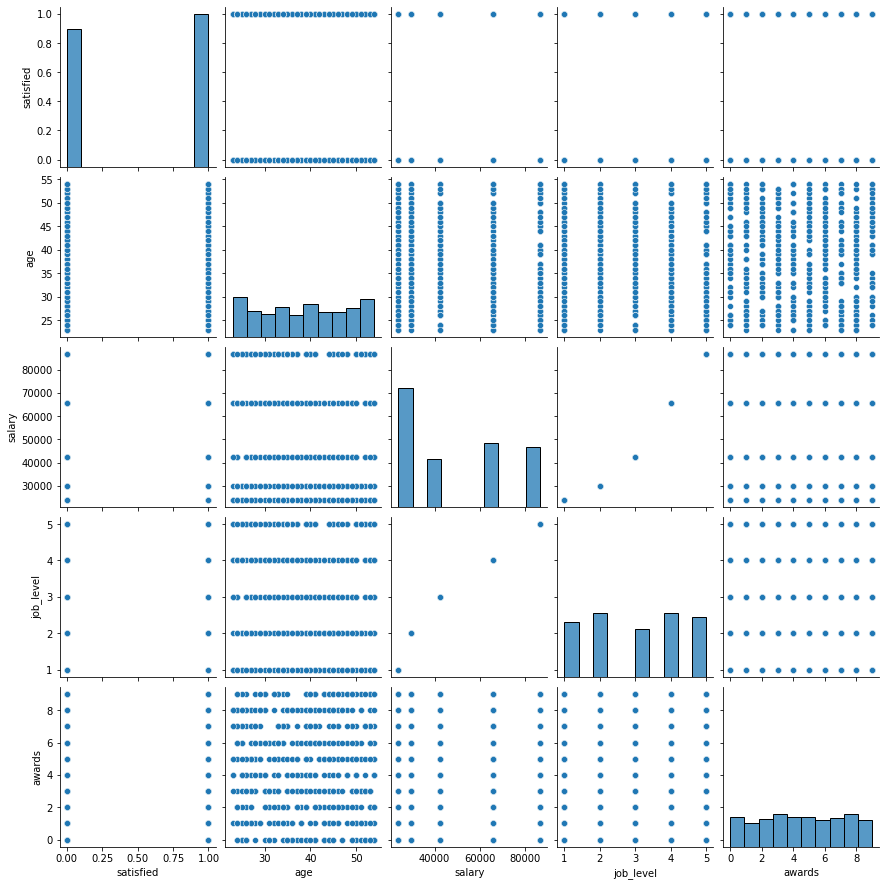

In [12]:
cols = ['satisfied', 'age', 'salary', 'job_level', 'awards']
sns_plot = sns.pairplot(data[cols])

In [13]:
plt = data['recruitment_type'].value_counts()
print(plt)

On-Campus             133
Referral              131
Walk-in               128
Recruitment Agency    108
Name: recruitment_type, dtype: int64


# Задание 2. Построение моделей машинного обучения.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [15]:
# перевод данных из текстового в числовой формат
def str2int(data, columns):
    # filtered_data = data.apply(pd.to_numeric, errors='ignore')

    # This is what you need
    le_dict = {}
    for col in columns:
        le_dict[col] = LabelEncoder().fit(data[col])
        data[col] = le_dict[col].transform(data[col])
        # filtered_data[col] = le_dict[col].transform(filtered_data[col])

    # enc = OneHotEncoder()
    # enc.fit(filtered_data)
    # refreshed_data = enc.transform(filtered_data).toarray()

    # new_data = data
    # for col in new_data.columns:
    #     new_data[col] = le_dict[col].transform(new_data[col])

    # new_refreshed_data = enc.transform(new_data).toarray()

## Этап 1.
### Дерево решений

In [16]:
data = pd.read_csv('Employee Satisfaction Index.csv')

# del data['emp_id']

# del data['Dept']
# del data['location']

# del data['recruitment_type']

# # проверка emp_id на одинаковые значения
# for i1, item1 in enumerate(data['emp_id']):
#     for i2, item2 in enumerate(data['emp_id']):
#         if i1 != i2 and item1 == item2:
#             print(f'EQUAL! ITEM_1 = {item1}, ITEM_2 = {item2}, ID_1 = {i1}, ID_2 = {i2}')

# перевод данных из текстового в числовой формат
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

# # проверка emp_id на одинаковые значения
# for i1, item1 in enumerate(data['emp_id']):
#     for i2, item2 in enumerate(data['emp_id']):
#         if i1 != i2 and item1 == item2:
#             print(f'EQUAL! ITEM_1 = {item1}, ITEM_2 = {item2}, ID_1 = {i1}, ID_2 = {i2}')

target = data['satisfied']
data.head(25)   

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,86,28,0,1,0,2,5,2,0,1,0,86750,1
1,1,408,50,4,1,0,3,3,5,1,2,1,42419,0
2,2,461,43,4,1,1,2,4,1,0,2,0,65715,0
3,3,361,44,3,0,0,0,2,3,1,0,0,29805,1
4,4,69,33,0,0,1,1,2,1,0,5,0,29805,1
5,5,277,40,2,1,1,2,3,3,0,7,1,42419,1
6,6,204,26,2,1,1,2,5,5,0,2,0,86750,0
7,7,447,25,4,0,1,1,1,1,0,4,0,24076,0
8,8,66,35,0,0,0,2,3,4,0,0,0,42419,1
9,9,493,45,4,0,0,2,3,3,0,9,0,42419,0


Весь набор данных будет разделен на обучающую и тестовую выборки в соотношении 70:30 с использованием train_test_split:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

Размер получившихся выборок:

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 14), (100, 14), (400,), (100,))

Создание дерева классификаии с использованием критерия качества разбиения - энтропия и максимальной глубиной дерева = 5.

In [19]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=15)

Обучение дерева:

In [20]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=15)

In [21]:
print(classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Метод ближайших соседей

In [22]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])
target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

In [24]:
print(classification_report(y_test, pred_knn, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.44      0.47      0.45        43
           1       0.58      0.56      0.57        57

    accuracy                           0.52       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.52      0.52      0.52       100



### Логистическая регрессия

In [25]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])
target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

In [26]:
logit = LogisticRegression(random_state=15)
logit.fit(X_train, y_train)
pred_log = logit.predict(X_test)

In [27]:
print(classification_report(y_test, pred_log, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.53      0.23      0.32        43
           1       0.59      0.84      0.70        57

    accuracy                           0.58       100
   macro avg       0.56      0.54      0.51       100
weighted avg       0.56      0.58      0.54       100



### Случайный лес

In [28]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])
target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

In [29]:
rndforest = RandomForestRegressor(random_state=15)
rndforest.fit(X_train, y_train)
pred_rndforest = rndforest.predict(X_test)

In [30]:
print(classification_report(y_test, pred_rndforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Градиентный бустинг

In [31]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])
target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

In [32]:
gradient = GradientBoostingClassifier(random_state=15)
gradient.fit(X_train, y_train)
pred_gradient = gradient.predict(X_test)

In [33]:
print(classification_report(y_test, pred_gradient, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Этап 2.

Функция преподготовки данных:

In [34]:
def preTraining(data):
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    del data['emp_id']
    return data

### Дерево решений

In [35]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

data = preTraining(data)

target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

Результаты из Этапа 1:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
    macro avg      1.00      1.00      1.00       100
    weighted avg   1.00      1.00      1.00       100


In [36]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=15)
clf_tree.fit(X_train, y_train)
print(classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Метод ближайших соседей

In [37]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

data.shape

(500, 14)

Преподготовка данных:

In [38]:
data = preTraining(data)
data.head(20)

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,0,1,0,2,5,2,0,1,0,86750,1
1,50,4,1,0,3,3,5,1,2,1,42419,0
2,43,4,1,1,2,4,1,0,2,0,65715,0
3,44,3,0,0,0,2,3,1,0,0,29805,1
4,33,0,0,1,1,2,1,0,5,0,29805,1
5,40,2,1,1,2,3,3,0,7,1,42419,1
6,26,2,1,1,2,5,5,0,2,0,86750,0
7,25,4,0,1,1,1,1,0,4,0,24076,0
8,35,0,0,0,2,3,4,0,0,0,42419,1
9,45,4,0,0,2,3,3,0,9,0,42419,0


In [39]:
data.shape

(500, 12)

In [40]:
target = data['satisfied']
# del data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)
# X_train

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

Результаты из Этапа 1:

              precision    recall  f1-score   support

           0       0.44      0.47      0.45        43
           1       0.58      0.56      0.57        57

    accuracy                           0.52       100
    macro avg      0.51      0.51      0.51       100
    weighted avg   0.52      0.52      0.52       100

In [42]:
print(classification_report(y_test, pred_knn, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53        43
           1       0.64      0.63      0.64        57

    accuracy                           0.59       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.59      0.59      0.59       100



### Логистическая регрессия

In [43]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

Преподготовка данных:

In [44]:
data = preTraining(data)
# data.head(20)

In [45]:
target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

In [46]:
logit = LogisticRegression(random_state=15)
logit.fit(X_train, y_train)
pred_log = logit.predict(X_test)

Результаты из Этапа 1:

              precision    recall  f1-score   support

           0       0.53      0.23      0.32        43
           1       0.59      0.84      0.70        57

    accuracy                           0.58       100
    macro avg      0.56      0.54      0.51       100
    weighted avg   0.56      0.58      0.54       100


In [47]:
print(classification_report(y_test, pred_log, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.57      1.00      0.73        57

    accuracy                           0.57       100
   macro avg       0.28      0.50      0.36       100
weighted avg       0.32      0.57      0.41       100



### Случайный лес

In [48]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

data = preTraining(data)

target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

In [49]:
rndforest = RandomForestRegressor(random_state=15)
rndforest.fit(X_train, y_train)
pred_rndforest = rndforest.predict(X_test)

Результаты из Этапа 1:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
    macro avg      1.00      1.00      1.00       100
    weighted avg   1.00      1.00      1.00       100


In [50]:
print(classification_report(y_test, pred_rndforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Градиентный бустинг

In [51]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

data = preTraining(data)

target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

In [52]:
gradient = GradientBoostingClassifier(random_state=15)
gradient.fit(X_train, y_train)
pred_gradient = gradient.predict(X_test)

Результаты из Этапа 1:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
    macro avg      1.00      1.00      1.00       100
    weighted avg   1.00      1.00      1.00       100


In [53]:
print(classification_report(y_test, pred_gradient, zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Этап 3.
### Дерево решений

In [54]:
data = pd.read_csv('Employee Satisfaction Index.csv')
str2int(data, ['emp_id', 'Dept', 'location', 'education', 'recruitment_type'])

data = preTraining(data)

target = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=15)

Результаты из Этапа 1:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
    macro avg      1.00      1.00      1.00       100
    weighted avg   1.00      1.00      1.00       100


Результаты из Этапа 2:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
    macro avg      1.00      1.00      1.00       100
    weighted avg   1.00      1.00      1.00       100


In [55]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=15)
clf_tree.fit(X_train, y_train)
print(classification_report(y_test, clf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Метод ближайших соседей

### Логистическая регрессия

### Случайный лес

### Градиентный бустинг